In [1]:
import data_utils
import matplotlib.pyplot as plt
import pandas as pd
import time

# Create correlated data set

The data contains 2*hyperparam_vol['nb_paths']. The first paths are generated, and the others created with a correlation coefficient rho from the first paths.

So the path [i] is correlated with the path [i + hyperparam_vol['nb_paths']].


IrregularDataset  (200, 1, 101)


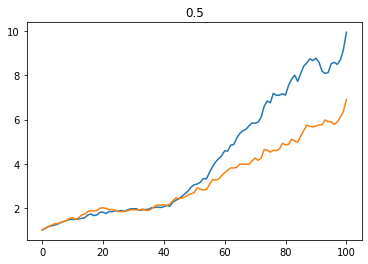

In [2]:
hyperparam_vol_1 = {
'drift': 2., 'volatility': 0.3, 'mean': 4,
'speed': 2., 'correlation': 0.5, 'nb_paths': 100, 'nb_steps': 100,
'S0': 1, 'maturity': 1., 'dimension': 1, 
'obs_perc': 0.1,
'scheme': 'euler', 'return_vol': False, 'v0': 1,
}

# rho is the correlation parameter
path, time_id = data_utils.create_correlated_dataset('BlackScholes',hyperparam_vol_1, rho=0.5)

data = data_utils.IrregularCorrelatedDataset(model_name='BlackScholes-corr', time_id=time_id)

plt.plot(data.stock_paths[100].reshape([-1]))
plt.plot(data.stock_paths[0].reshape([-1]))
plt.title(0.5)
plt.show()

# Check if for different values of rho it works

IrregularDataset  (200, 1, 101)


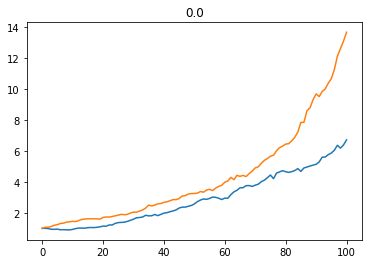

IrregularDataset  (200, 1, 101)


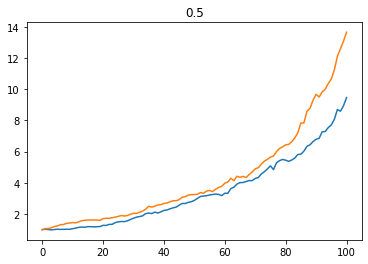

IrregularDataset  (200, 1, 101)


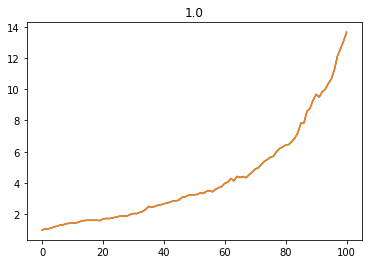

In [5]:
stock_model_names = ('BlackScholes', 'BlackScholes')

for rho in [0., 0.5, 1.]:
    hyperparam_vol_1 = {
    'drift': 2., 'volatility': 0.3, 'mean': 4,
    'speed': 2., 'correlation': 0.5, 'nb_paths': 100, 'nb_steps': 100,
    'S0': 1, 'maturity': 1., 'dimension': 1, 
    'obs_perc': 0.1,
    'scheme': 'euler', 'return_vol': False, 'v0': 1,
    }
    
    # Must wait for the time_id to be different
    time.sleep(5)
    path, time_id = data_utils.create_correlated_dataset('BlackScholes',hyperparam_vol_1, rho=rho, seed=1)

    data = data_utils.IrregularCorrelatedDataset(model_name='BlackScholes-corr', time_id=time_id)

    plt.plot(data.stock_paths[100].reshape([-1]))
    plt.plot(data.stock_paths[0].reshape([-1]))
    plt.title(rho)
    plt.show()